## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe - with given column names.

In [3]:
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [5]:
df.tail()

,DATE,TAG,POSTS
2351,2022-09-01 00:00:00,php,3801
2352,2022-09-01 00:00:00,python,21627
2353,2022-09-01 00:00:00,r,4139
2354,2022-09-01 00:00:00,ruby,489
2355,2022-09-01 00:00:00,swift,1901


Check how many rows and how many columns there are.(dimensions of the dataframe).

In [6]:
df.shape

(2356, 3)

Count the number of entries in each column of the dataframe

In [7]:
df.count()

DATE     2356
TAG      2356
POSTS    2356
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
df.groupby("TAG").sum()

C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_9652\3643815953.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum()


,POSTS
TAG,
assembly,41178
c,385507
c#,1559333
c++,776599
delphi,50096
go,64563
java,1865248
javascript,2425727
perl,67127


In [9]:
df.groupby("TAG").sum().idxmax()

C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_9652\1743975303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum().idxmax()


POSTS    javascript
dtype: object

In [10]:
df.groupby("TAG").sum().max()

C:\Users\AS-Computer\AppData\Local\Temp\ipykernel_9652\495894068.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum().max()


POSTS    2425727
dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 


In [11]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,170,170
c,170,170
c#,171,171
c++,170,170
delphi,170,170
go,155,155
java,170,170
javascript,170,170
perl,170,170


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [12]:
df.DATE[1]
# df["DATE"][1]

'2008-08-01 00:00:00'

In [13]:
type(df.DATE[1])

str

In [14]:
new_date = pd.to_datetime(df["DATE"][1])
type(new_date)

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df.DATE = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



What are the dimensions of our new dataframe? How many rows and columns does it have? (After pivvoting it) Print out the column names and print out the first 5 rows of the dataframe.

In [16]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [17]:
df.shape

(2356, 3)

In [18]:
pivoted_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1646.0,753.0,104.0,NaN,1132.0,636.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,582.0,97.0,501.0,451.0,1.0,158.0,NaN


In [19]:
pivoted_df.shape

(171, 14)

In [20]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

Count the number of entries per programming language. Why might the number of entries be different? - NaN values were inserted by pivoting the table when there were no posts for a language in that month

In [21]:
pivoted_df.count()

TAG
assembly      170
c             170
c#            171
c++           170
delphi        170
go            155
java          170
javascript    170
perl          170
php           170
python        170
r             168
ruby          170
swift         162
dtype: int64

Substitute the number 0 for each NaN value in the DataFrame. fillna() method.
The inplace argument means that we are updating reshaped_df.

In [22]:
pivoted_df.fillna(0, inplace=True)

In [23]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1646.0,753.0,104.0,0.0,1132.0,636.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,582.0,97.0,501.0,451.0,1.0,158.0,0.0


We can also check if there are any NaN values left in the entire DataFrame 

In [24]:
pivoted_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


Using the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) ploting a single programming language (e.g., java) on a chart.

In [30]:
pivoted_df["java"].head()

DATE
2008-07-01       0.0
2008-08-01     222.0
2008-09-01    1132.0
2008-10-01    1149.0
2008-11-01     957.0
Name: java, dtype: float64

In [33]:
pivoted_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01'],
              dtype='datetime64[ns]', name='DATE', length=171, freq=None)

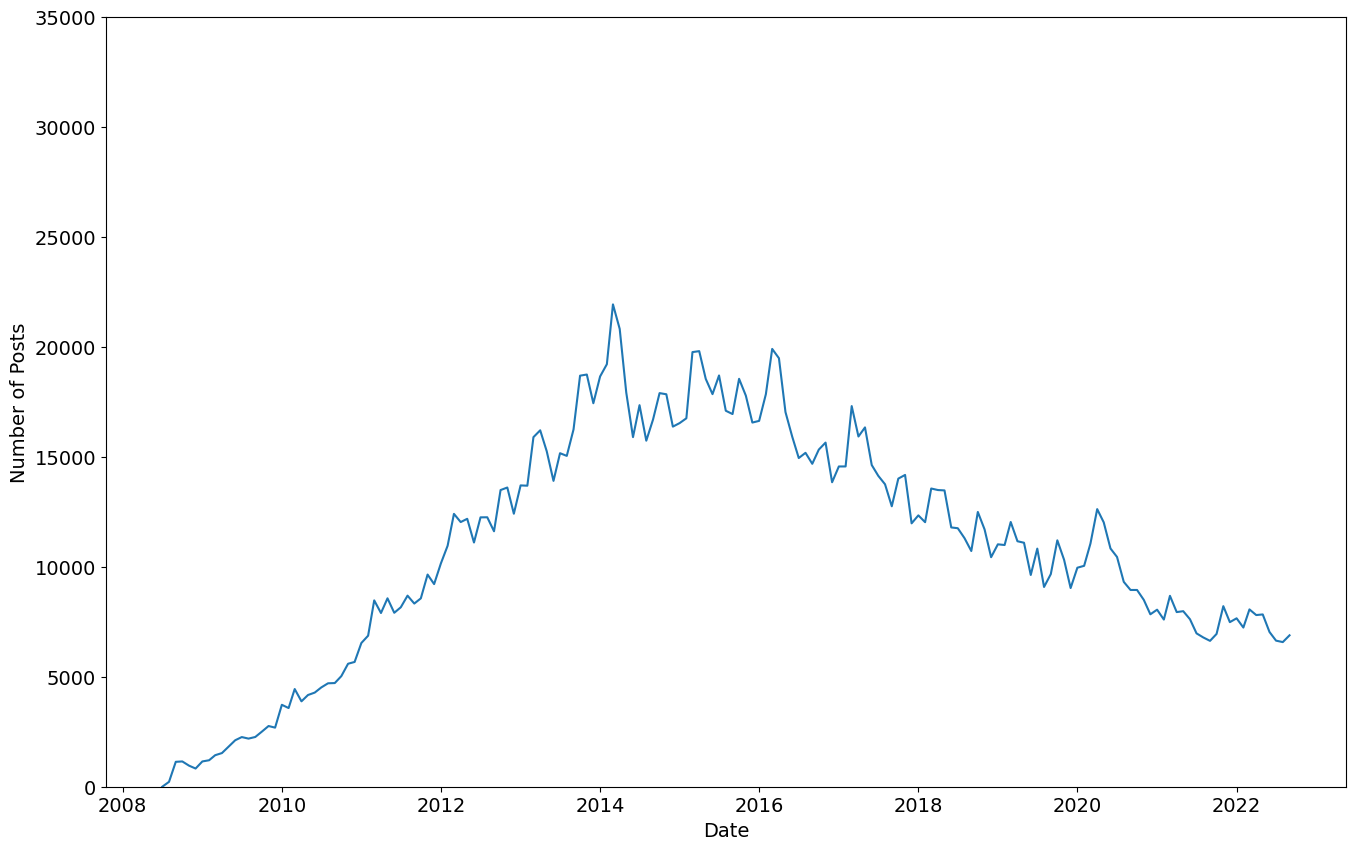

In [39]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(pivoted_df.index, pivoted_df["java"])

Show two lines (e.g. for Java and Python) on the same chart.

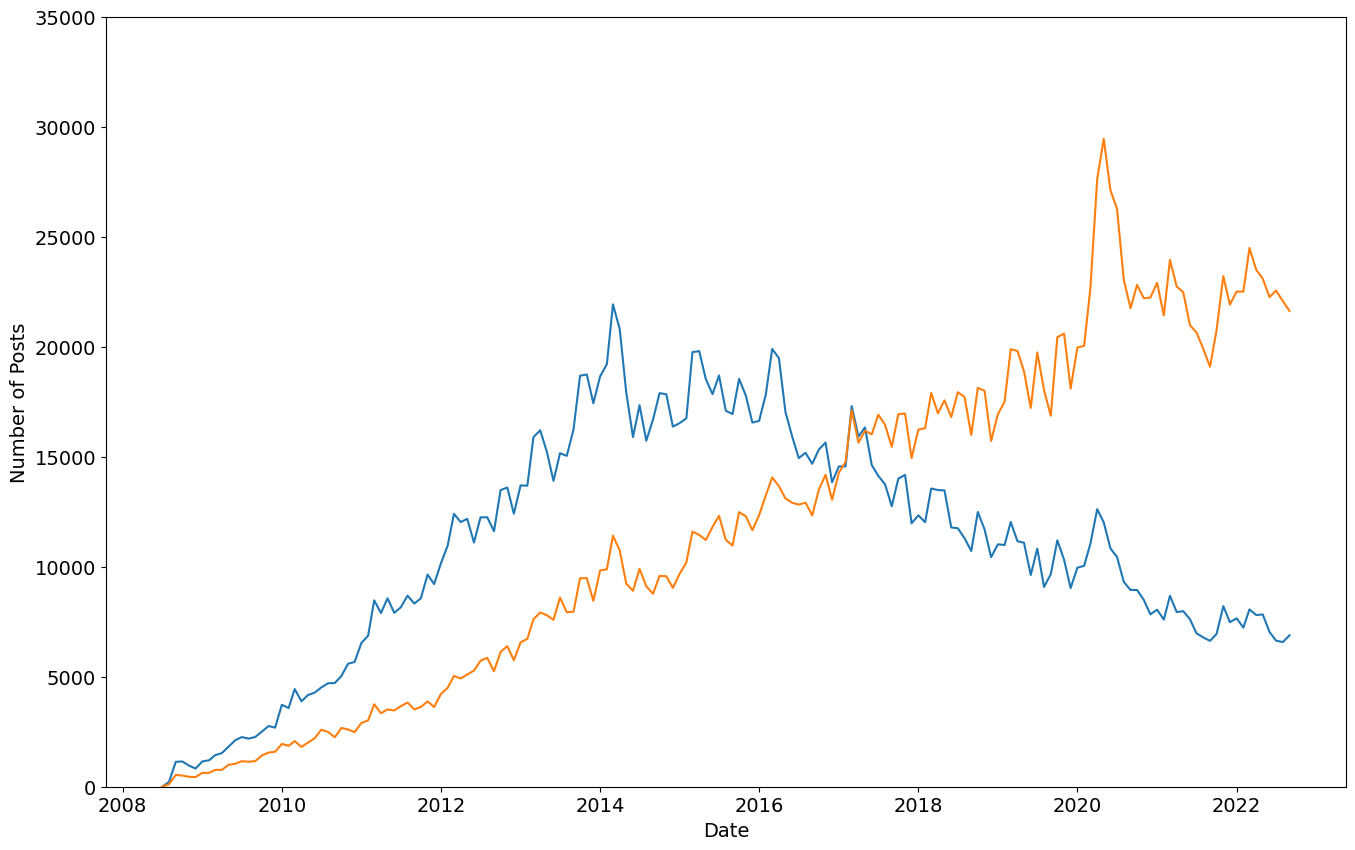

In [41]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
# plt.plot(pivoted_df.index, pivoted_df[["java","python"]])

plt.plot(pivoted_df.index, pivoted_df.java)
plt.plot(pivoted_df.index, pivoted_df.python)


Showing all the languages on the same chart.

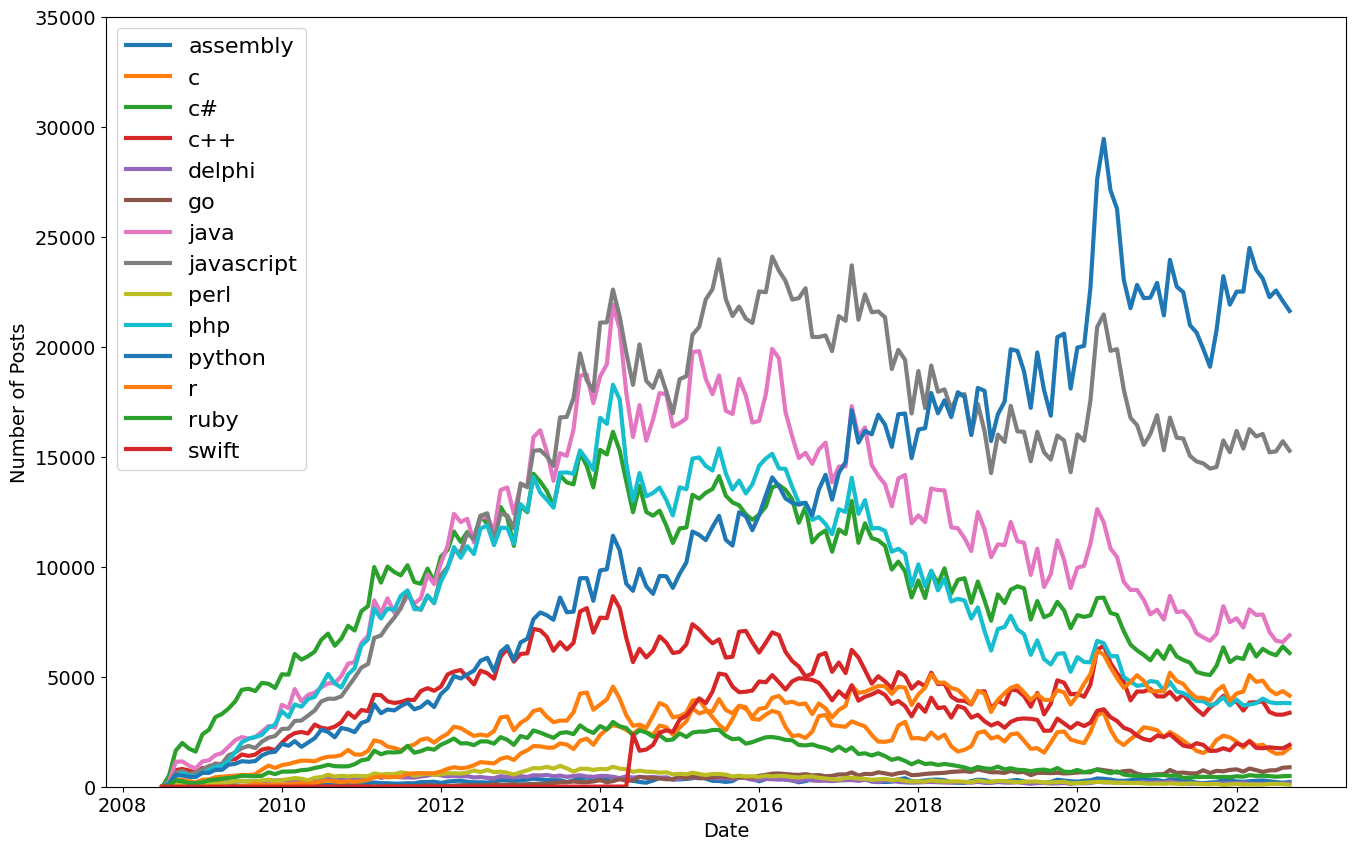

In [47]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
# plt.plot(pivoted_df.index, pivoted_df[["java","python"]])

# plt.plot(pivoted_df.index, pivoted_df.java)
# plt.plot(pivoted_df.index, pivoted_df.python)

# iterate through all the languages
for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], 
        linewidth=3, label=pivoted_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

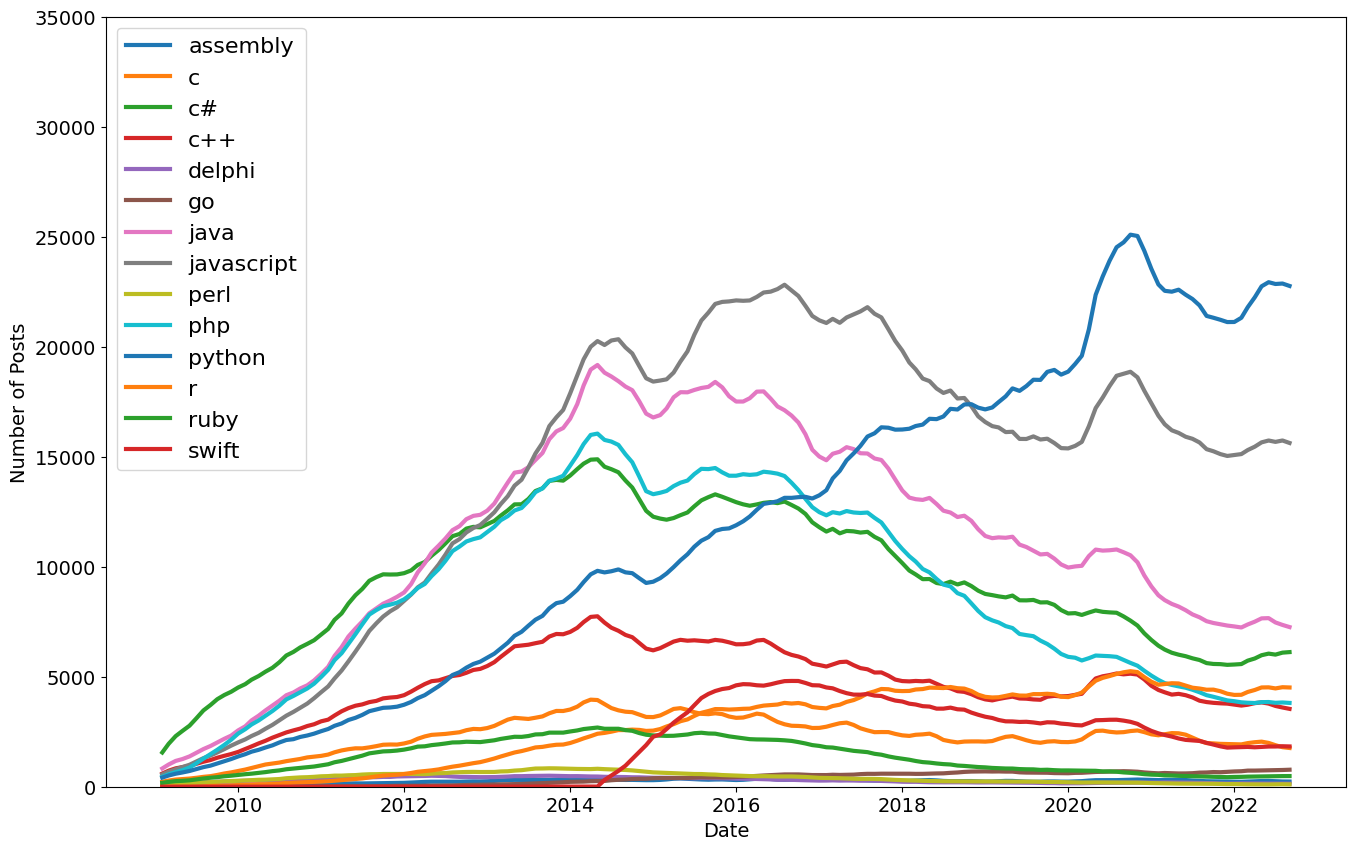

In [52]:
# window is the number of observations that are averaged
roll_df = pivoted_df.rolling(window=8).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

# iterate through all the languages
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
        linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)